In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [4]:
paths = [
    "data4/109_sim_10000_100_10_0.3_0.3_0.7_1/",
    "data4/110_sim_10000_200_20_0.3_0.3_0.7_1/",
    "data4/111_sim_10000_500_50_0.3_0.3_0.7_1/",
    "data4/114_sim_10000_1000_100_0.3_0.3_0.7_1/"
]

names = [
    "100/10",
    "200/20",
    "500/50",
    "1000/100"
]

df_list = []
for path in paths:
    df = pd.read_csv(os.path.join(path, "formatted_scores.csv"))
    df_list.append(df)

models = df_list[0]['Unnamed: 0'].to_list()
print(models)
metrics = df_list[0].columns[1:].to_list()
print(metrics)



['FA_latent', 'True_latent', 'VAE_latent', 'full']
['mse', 'rmse', 'mae', 'r2', 'adjusted_r2', 'bic', 'aic']


In [5]:

def get_value_and_std(string):
    value, std = string.split(" ")
    std = std.strip("()")
    return float(value), float(std)

print(get_value_and_std(df_list[0][metrics[0]].iloc[0]))

(26.4914, 9.701)


C:\Users\beren\AppData\Local\Temp\ipykernel_25036\2609519296.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


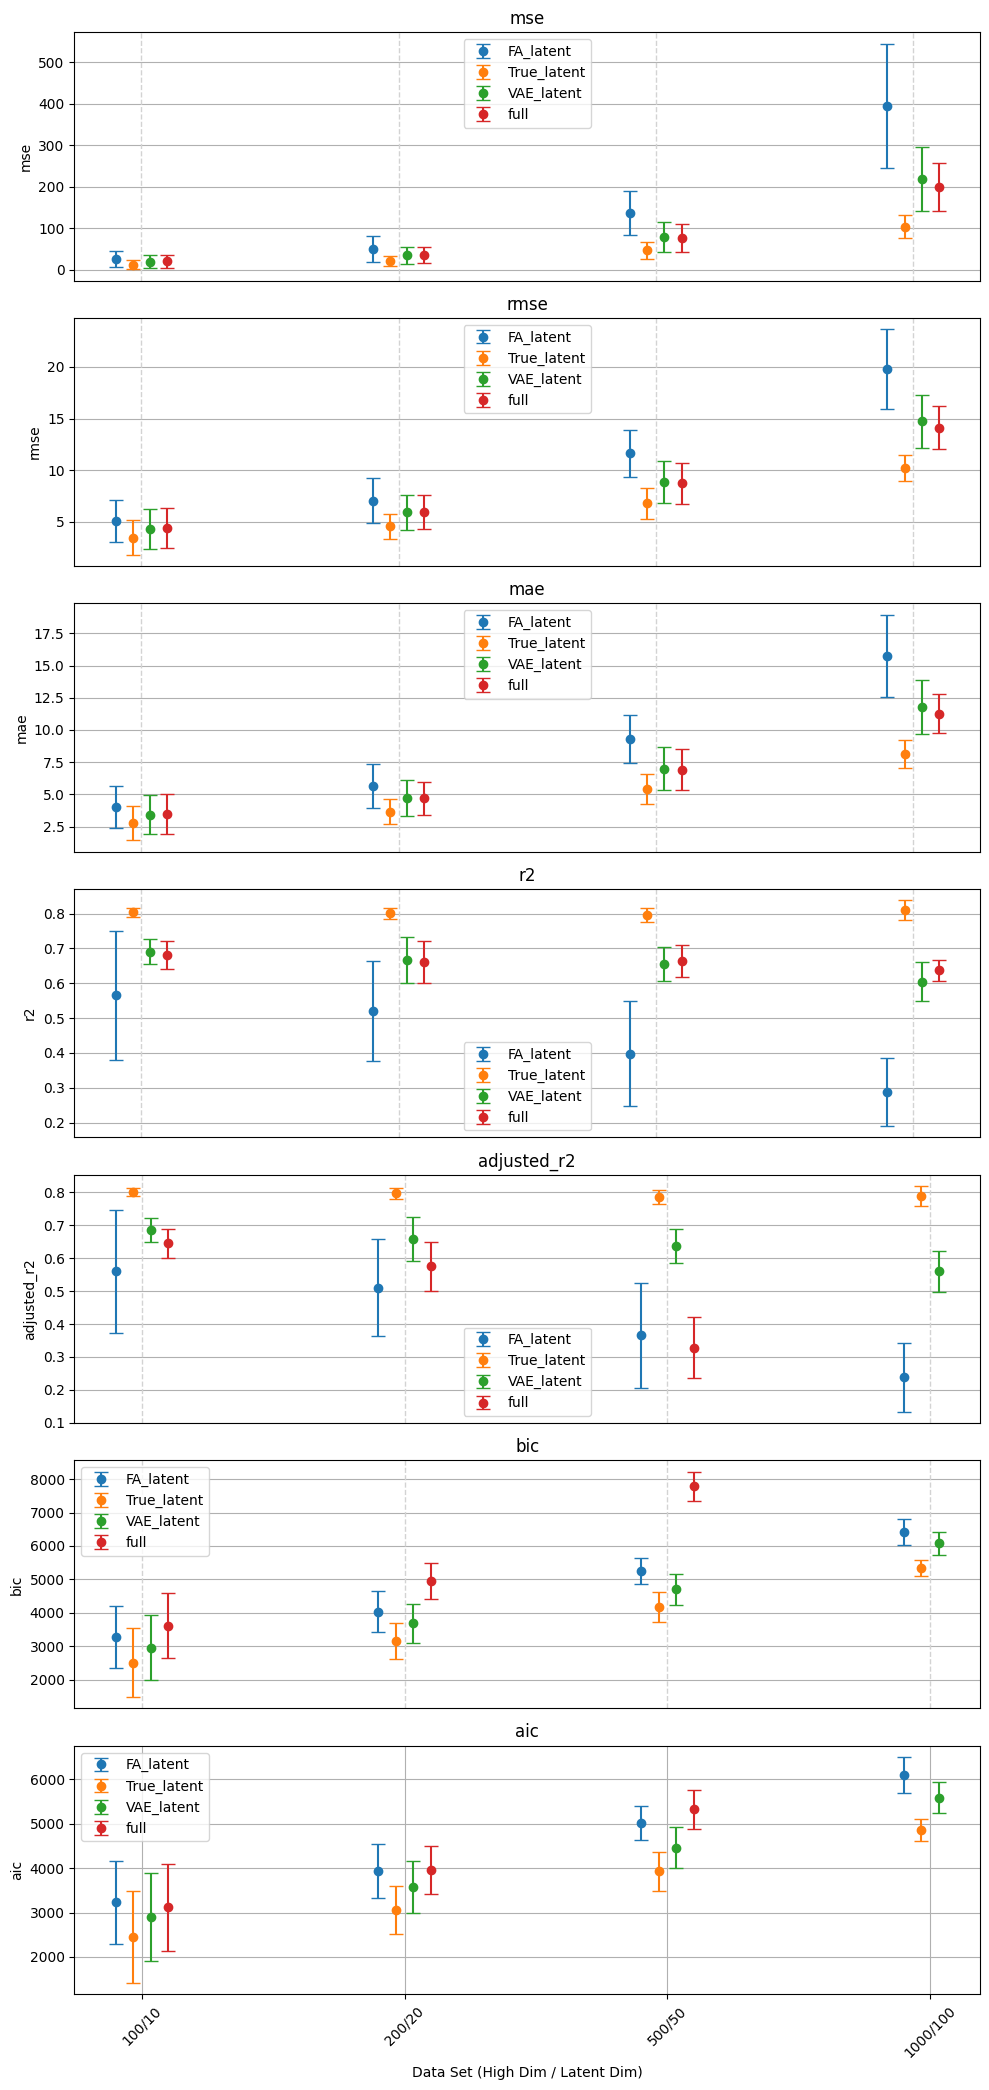

In [6]:
import numpy as np

fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

x = np.arange(len(names))  # numeric x positions
offsets = np.linspace(-0.1, 0.1, len(models))  # small shifts per model

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        y_val = []
        y_std = []
        for k in range(len(names)):
            value, std = get_value_and_std(df_list[k][metric].iloc[j])
            if not (model=="full" and metric in ["adjusted_r2", "bic", "aic"] and k==3):
                y_val.append(value)
                y_std.append(std)
            else:
                y_val.append(np.nan)
                y_std.append(np.nan)

        # apply offset for this model
        axs[i].errorbar(
            x + offsets[j], y_val, 
            yerr=[y*1.96 for y in y_std], 
            label=model, capsize=5, marker='o', linestyle='None'
        )

    axs[i].set_title(metric)
    axs[i].legend()
    if i == len(metrics) - 1:
        axs[i].set_xlabel("Data Set (High Dim / Latent Dim)")
        axs[i].set_xticks(x)                 # put ticks at numeric positions
        axs[i].set_xticklabels(names, rotation=45)
    else:
        # Hide x ticks for other plots
        axs[i].set_xticks([])
        # Add 4 vertical grid lines at each x position
        for pos in x:
            axs[i].axvline(pos, color='lightgray', linestyle='--', linewidth=1)
    axs[i].set_ylabel(metric)
    axs[i].grid()

    

fig.tight_layout()
# plt.savefig("figures/metrics_10pct_latent.png")
fig.show()


In [12]:
paths = [
    "data8/1_sim_10000_200_20_0_0_0.7_1/",
    "data8/2_sim_10000_200_20_0.125_0.125_0.7_1/",
    "data8/3_sim_10000_200_20_0.25_0.25_0.7_1/",
    "data8/4_sim_10000_200_20_0.375_0.375_0.7_1/",
    "data8/5_sim_10000_200_20_0.5_0.5_0.7_1/"
]

names = [
    "non_linear_ratio_0",
    "non_linear_ratio_0.25",
    "non_linear_ratio_0.5",
    "non_linear_ratio_0.75", 
    "non_linear_ratio_1"
]

df_list = []
for path in paths:
    df = pd.read_csv(os.path.join(path, "formatted_scores.csv"))
    df_list.append(df)

models = df_list[0]['Unnamed: 0'].to_list()
print(models)
metrics = df_list[0].columns[1:].to_list()
print(metrics)



['FA_latent', 'True_latent', 'VAE_latent', 'full']
['mse', 'rmse', 'mae', 'r2', 'adjusted_r2', 'bic', 'aic']


In [13]:

def get_value_and_std(string):
    value, std = string.split(" ")
    std = std.strip("()")
    return float(value), float(std)

print(get_value_and_std(df_list[0][metrics[0]].iloc[0]))

(2616.1091, 627.2904)


C:\Users\beren\AppData\Local\Temp\ipykernel_25036\1014943202.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


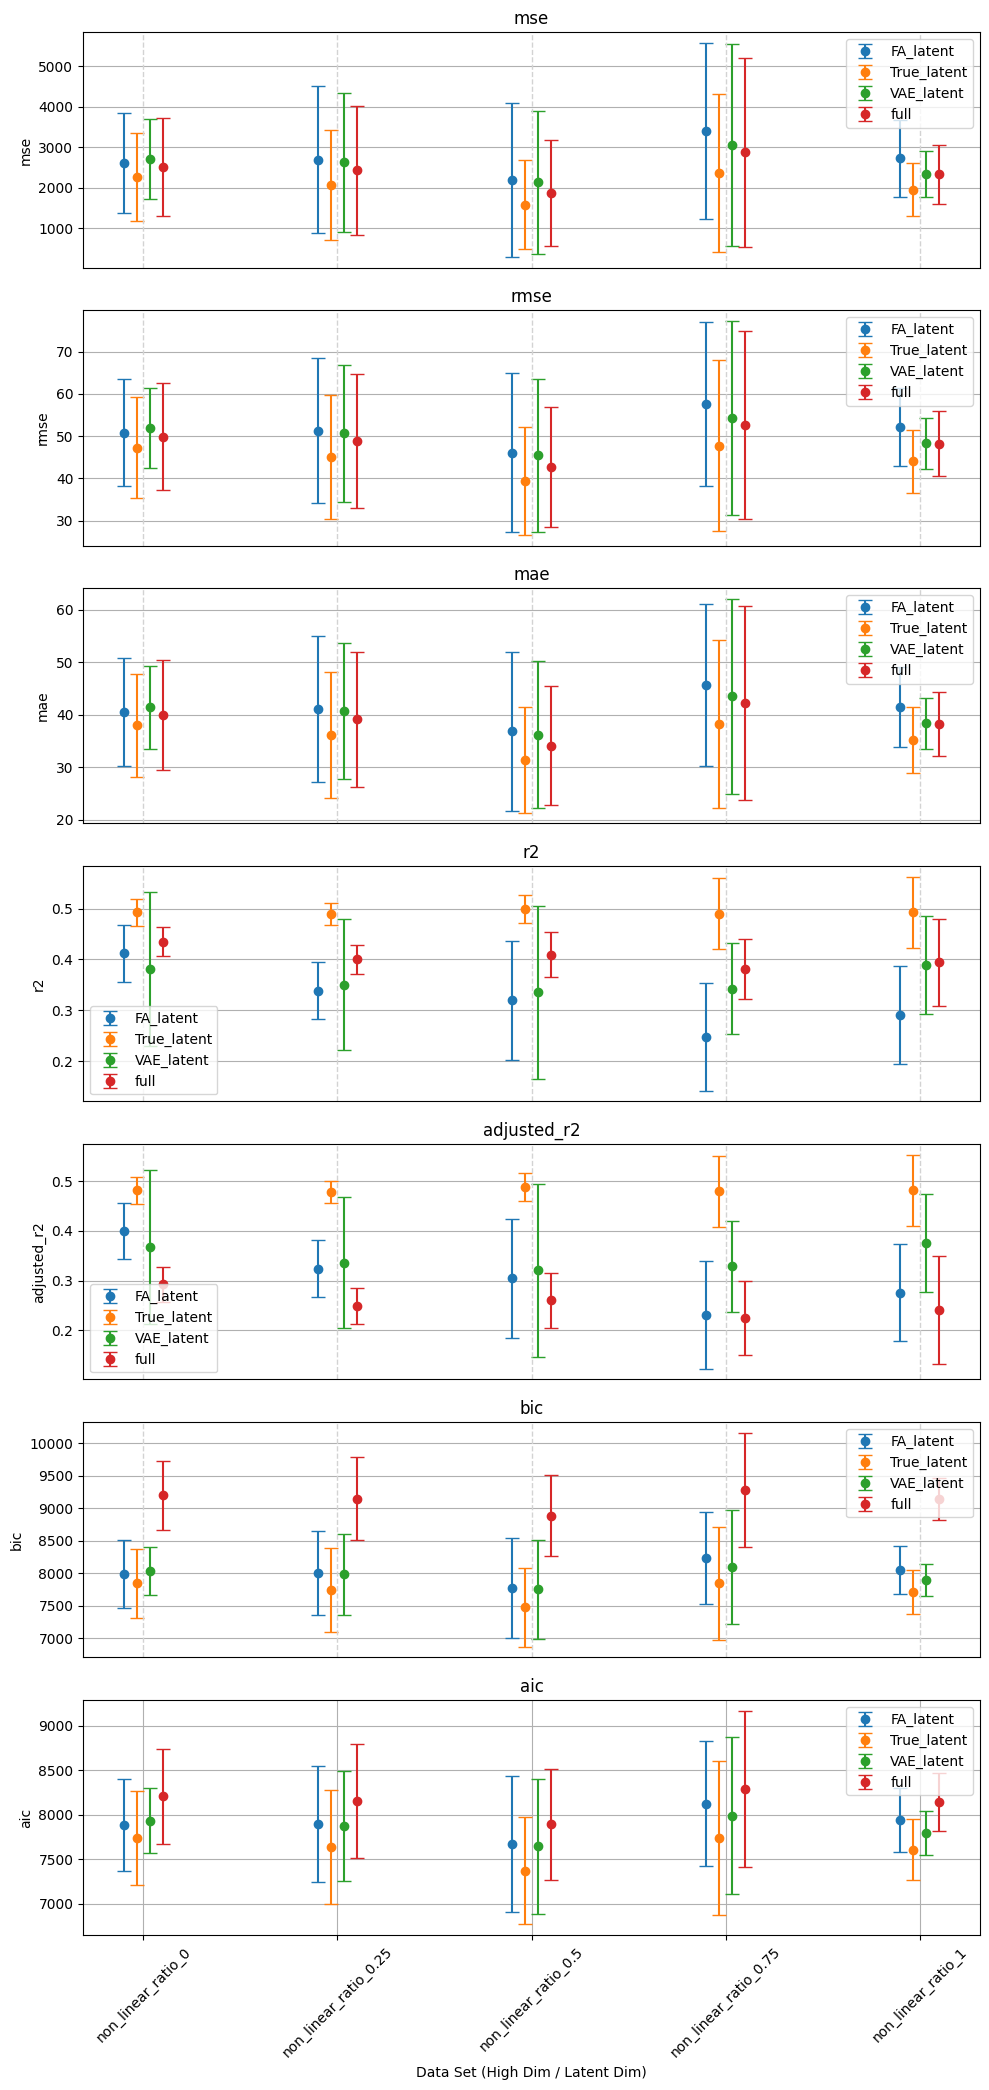

In [14]:
import numpy as np

fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

x = np.arange(len(names))  # numeric x positions
offsets = np.linspace(-0.1, 0.1, len(models))  # small shifts per model

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        y_val = []
        y_std = []
        for k in range(len(names)):
            value, std = get_value_and_std(df_list[k][metric].iloc[j])
            y_val.append(value)
            y_std.append(std)

        # apply offset for this model
        axs[i].errorbar(
            x + offsets[j], y_val, 
            yerr=[y*1.96 for y in y_std], 
            label=model, capsize=5, marker='o', linestyle='None'
        )

    axs[i].set_title(metric)
    axs[i].legend()
    if i == len(metrics) - 1:
        axs[i].set_xlabel("Data Set (High Dim / Latent Dim)")
        axs[i].set_xticks(x)                 # put ticks at numeric positions
        axs[i].set_xticklabels(names, rotation=45)
    else:
        # Hide x ticks for other plots
        axs[i].set_xticks([])
        # Add 4 vertical grid lines at each x position
        for pos in x:
            axs[i].axvline(pos, color='lightgray', linestyle='--', linewidth=1)
    axs[i].set_ylabel(metric)
    axs[i].grid()

    

fig.tight_layout()
# plt.savefig("figures/metrics_10pct_latent.png")
fig.show()


In [10]:
paths = [
    "data7/1_sim_10000_200_10_0.3_0.3_0.7_1/",
    "data7/2_sim_10000_200_20_0.3_0.3_0.7_1/",
    "data7/3_sim_10000_200_50_0.3_0.3_0.7_1/",
    "data7/4_sim_10000_200_100_0.3_0.3_0.7_1/"
]

names = [
    "200/10",
    "200/20",
    "200/50",
    "200/100"
]

df_list = []
for path in paths:
    df = pd.read_csv(os.path.join(path, "formatted_scores.csv"))
    df_list.append(df)

models = df_list[0]['Unnamed: 0'].to_list()
print(models)
metrics = df_list[0].columns[1:].to_list()
print(metrics)



['FA_latent', 'True_latent', 'VAE_latent', 'full']
['mse', 'rmse', 'mae', 'r2', 'adjusted_r2', 'bic', 'aic']


C:\Users\beren\AppData\Local\Temp\ipykernel_25036\1014943202.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


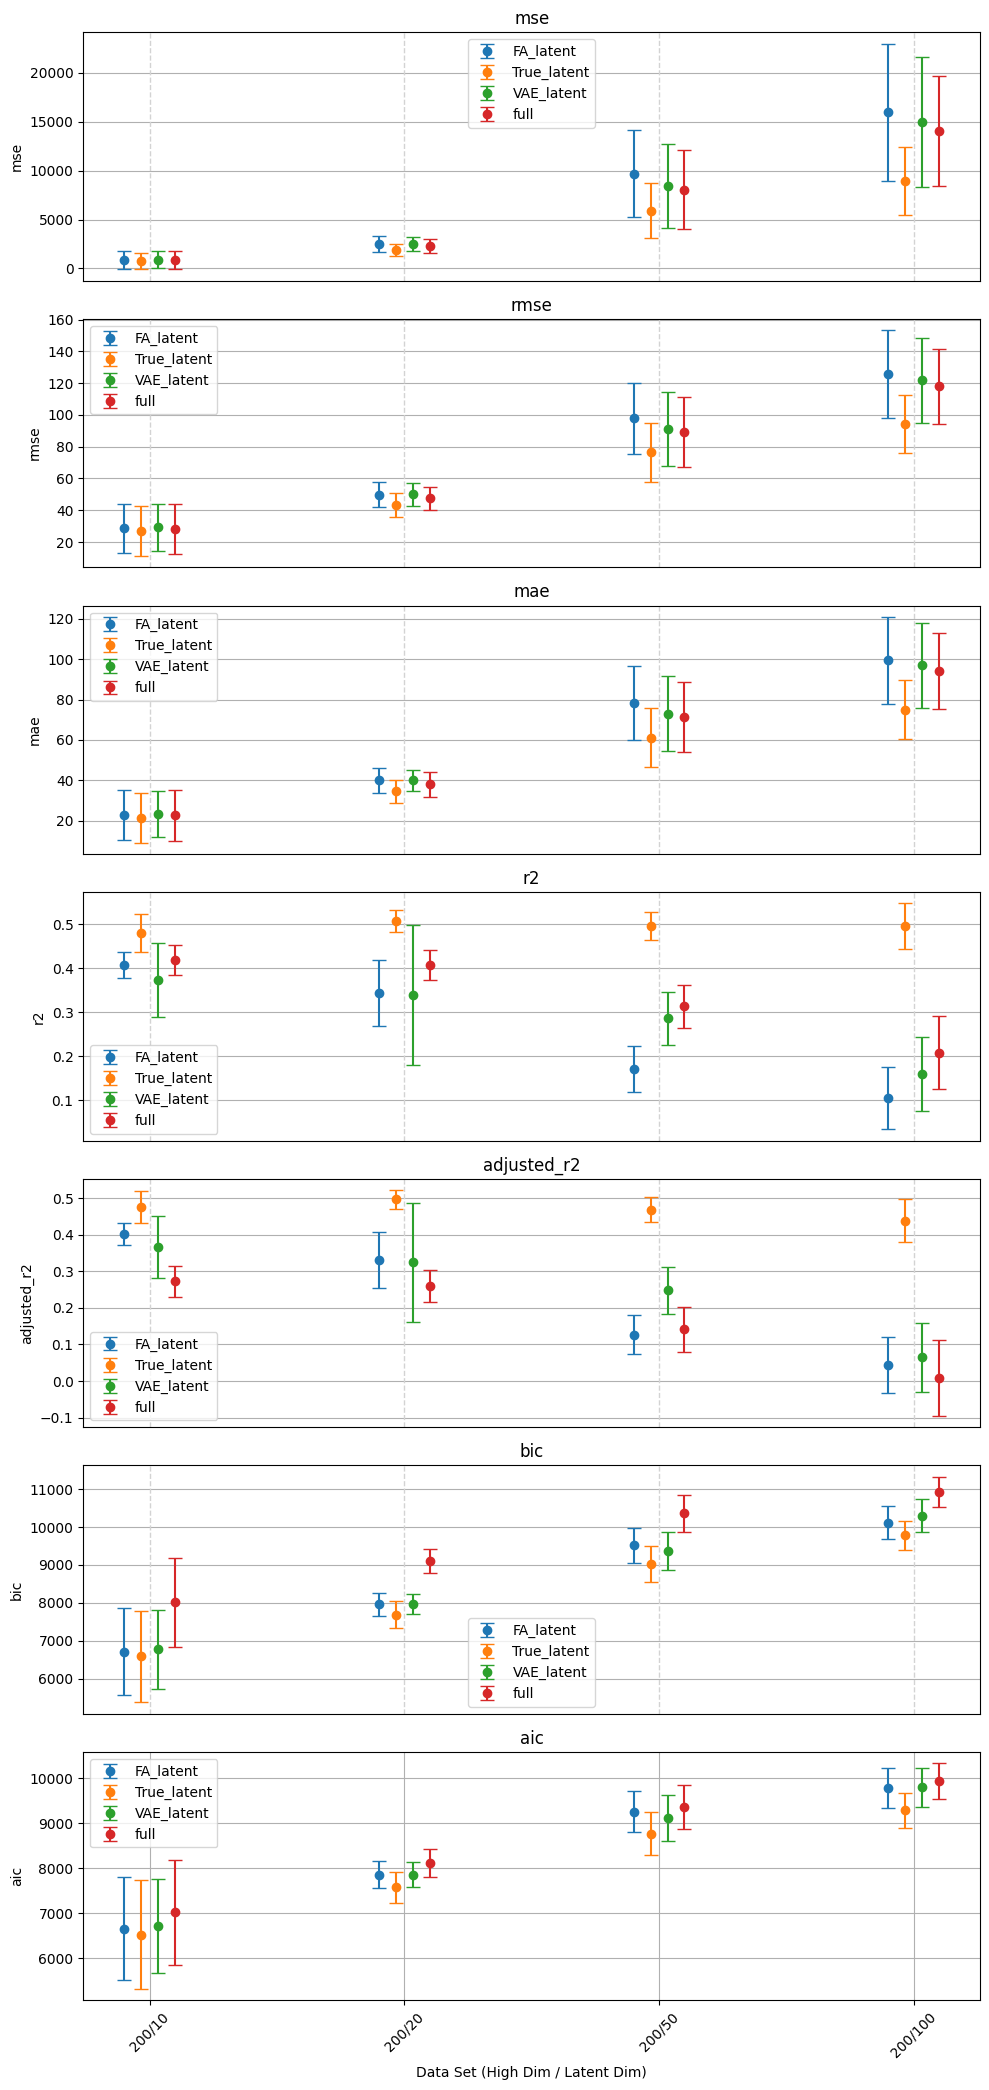

In [11]:
import numpy as np

fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

x = np.arange(len(names))  # numeric x positions
offsets = np.linspace(-0.1, 0.1, len(models))  # small shifts per model

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        y_val = []
        y_std = []
        for k in range(len(names)):
            value, std = get_value_and_std(df_list[k][metric].iloc[j])
            y_val.append(value)
            y_std.append(std)

        # apply offset for this model
        axs[i].errorbar(
            x + offsets[j], y_val, 
            yerr=[y*1.96 for y in y_std], 
            label=model, capsize=5, marker='o', linestyle='None'
        )

    axs[i].set_title(metric)
    axs[i].legend()
    if i == len(metrics) - 1:
        axs[i].set_xlabel("Data Set (High Dim / Latent Dim)")
        axs[i].set_xticks(x)                 # put ticks at numeric positions
        axs[i].set_xticklabels(names, rotation=45)
    else:
        # Hide x ticks for other plots
        axs[i].set_xticks([])
        # Add 4 vertical grid lines at each x position
        for pos in x:
            axs[i].axvline(pos, color='lightgray', linestyle='--', linewidth=1)
    axs[i].set_ylabel(metric)
    axs[i].grid()

    

fig.tight_layout()
# plt.savefig("figures/metrics_10pct_latent.png")
fig.show()
